In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt, loadtxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Ruído Rosa</center>
* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.3.b"

A = loadtxt("noise_equals_1.txt")
    
savetxt(name + ".txt", A)

save_A = A

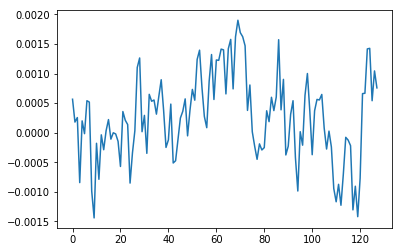

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [4]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.000244138427734
var  :  8.58551688601e-07
skew :  -0.0935099523351
kurt :  0.0896515440478
Q1   :  -0.00036925
Q3   :  0.00085


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

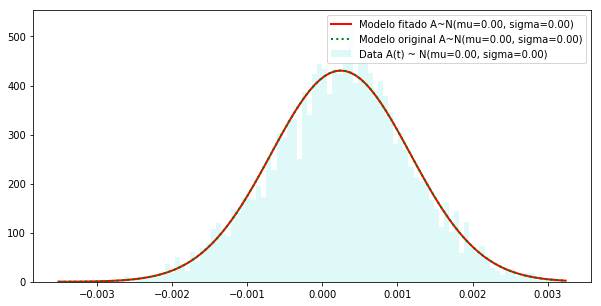

In [5]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

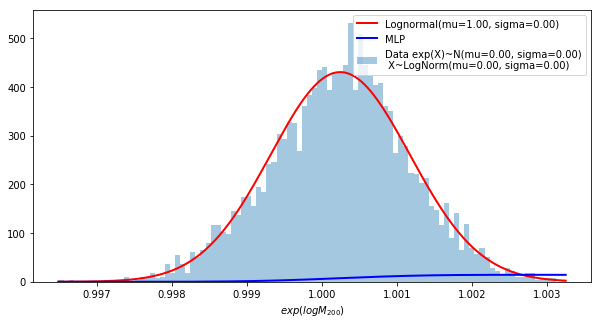

In [6]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.13071356411666873, -0.0070480477939303572, 0.0072314132330994754)
        Fitado			 Original
mean :  0.0002454081707660878 	 0.000244138427734
var  :  9.166921486879154e-07 	 8.58551688601e-07
skew :  0.3960839243133013 	 -0.09350995233510521
kurt :  0.2802107469047588 	 0.08965154404783382


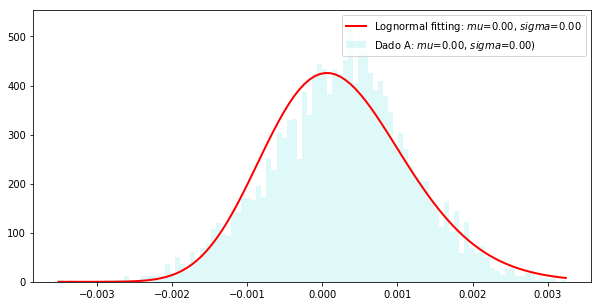

In [7]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.003515   max:  0.003241 
median:  0.000275 
mean:  0.0002441384 
estimated sd:  0.0009266938 
estimated skewness:  -0.09354421 
estimated kurtosis:  3.091227 



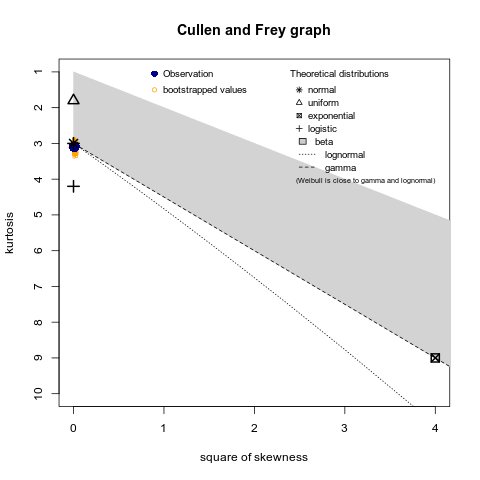

In [8]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (6.8872790152682954, 5.5222449533439733, -0.0036149999999999997, 0.0069559999999999995)
        Fitado			 Original
mean :  0.00024557619545930885 	 0.000244138427734
var  :  8.91166568078e-07 	 8.58551688601e-07
skew :  -0.11249905095316202 	 -0.09350995233510521
kurt :  -0.3716175022973669 	 0.08965154404783382


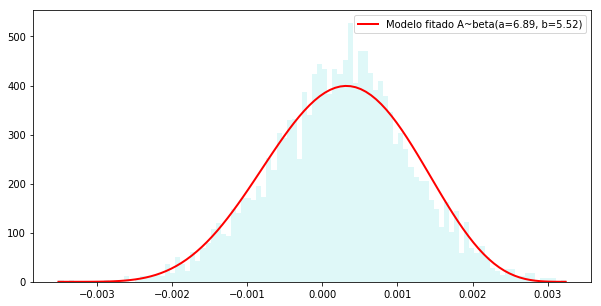

In [9]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

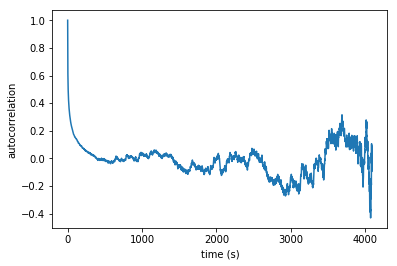

In [10]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [  5.65000000e-04   1.79000000e-04   2.55000000e-04  -8.45000000e-04
   1.99000000e-04  -1.70000000e-05   5.40000000e-04   5.17000000e-04
  -9.90000000e-04  -1.44200000e-03]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


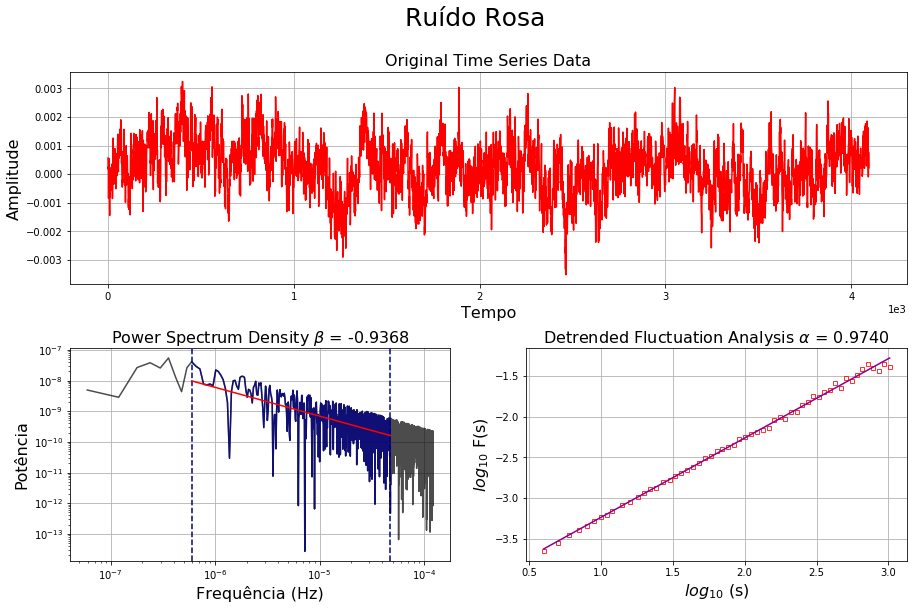

In [11]:
aux.plot_psd_dfa(A, 'Ruído Rosa')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [12]:
A = save_A[1024:]
name = "A.ex:1.3.b"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [13]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  6.72652994792e-05
var  :  7.85688368744e-07
skew :  -0.139844021357
kurt :  0.106960696185
Q1   :  -0.000522
Q3   :  0.00066375


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

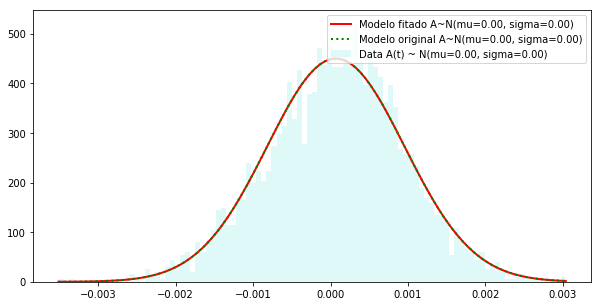

In [14]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

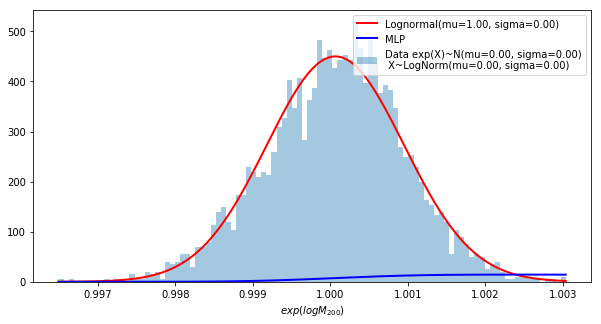

In [15]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.12728142579988691, -0.0071082415072294194, 0.007119030503917519)
        Fitado			 Original
mean :  6.868932979979623e-05 	 6.72652994792e-05
var  :  8.412600040768991e-07 	 7.85688368744e-07
skew :  0.3854833048687238 	 -0.13984402135746263
kurt :  0.2653475025269669 	 0.10696069618538662


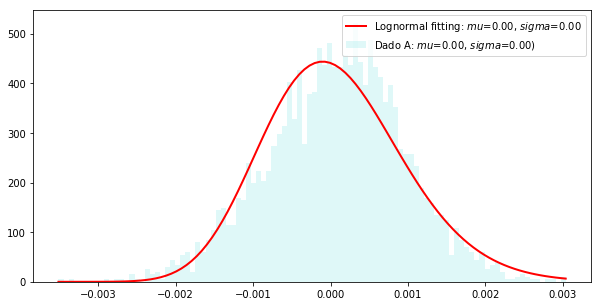

In [16]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.003515   max:  0.003036 
median:  0.0001045 
mean:  6.72653e-05 
estimated sd:  0.0008865349 
estimated skewness:  -0.1399123 
estimated kurtosis:  3.109091 



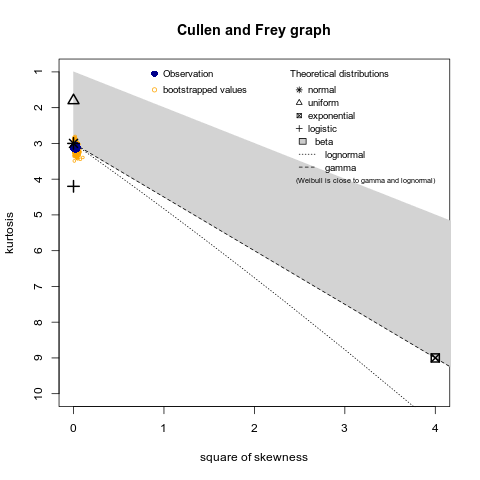

In [17]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (7.006461608771855, 5.840843456434146, -0.0036149999999999997, 0.0067509999999999992)
        Fitado			 Original
mean :  6.675442871063733e-05 	 6.72652994792e-05
var  :  8.160583176064381e-07 	 7.85688368744e-07
skew :  -0.09133434933275673 	 -0.13984402135746263
kurt :  -0.3668899199974081 	 0.10696069618538662


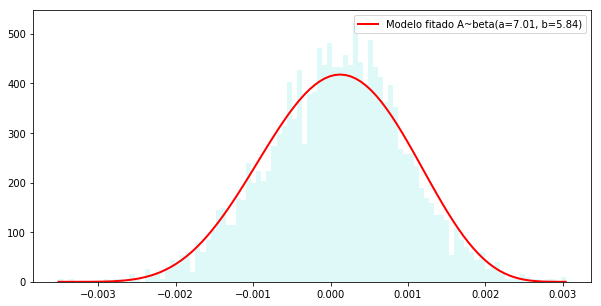

In [18]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

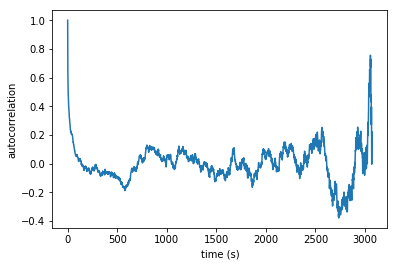

In [19]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [  6.52000000e-04  -1.36000000e-04   3.85000000e-04   1.98000000e-04
   8.50000000e-04   8.75000000e-04   1.23300000e-03   1.64300000e-03
   1.02000000e-03   5.10000000e-05]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


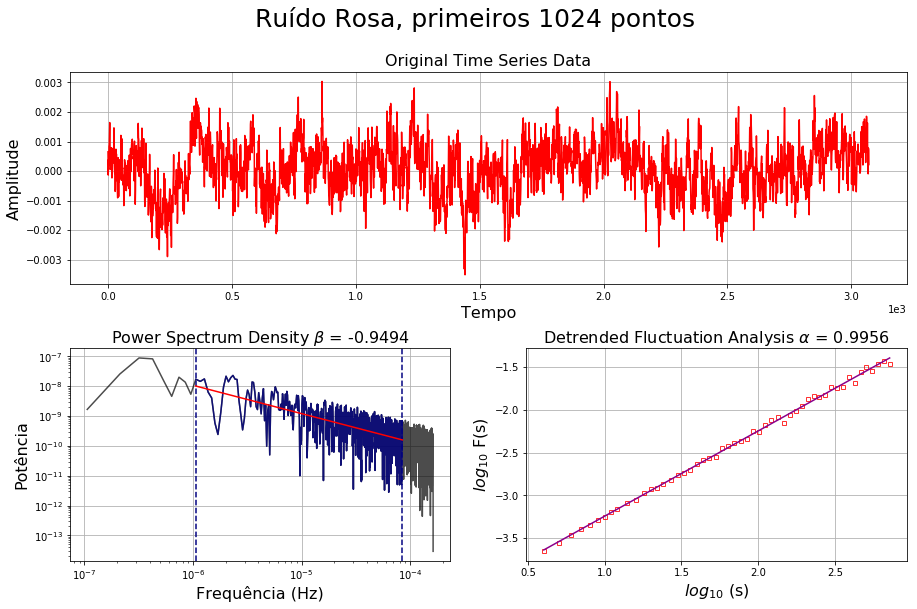

In [20]:
aux.plot_psd_dfa(A, 'Ruído Rosa, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [21]:
A = save_A[3*1024:4096]
name = "A.ex:1.3.b"
savetxt(name + ".txt", A)

In [22]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [23]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  5.81640625e-05
var  :  7.28789928162e-07
skew :  -0.00513776542445
kurt :  -0.110061013972
Q1   :  -0.000515
Q3   :  0.00062825


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

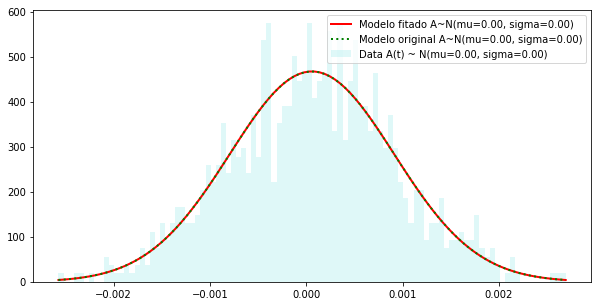

In [24]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

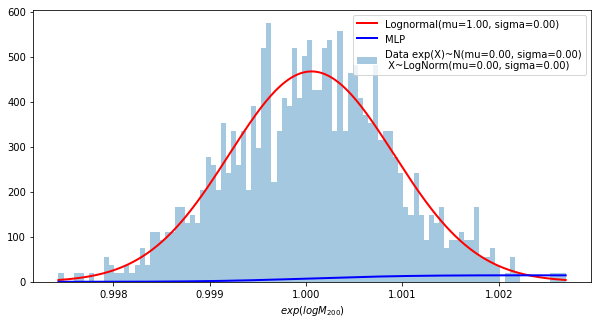

In [25]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.16643915126032455, -0.0052453091862056465, 0.0052325298376193295)
        Fitado			 Original
mean :  6.020065492408702e-05 	 5.81640625e-05
var  :  7.906686716525222e-07 	 7.28789928162e-07
skew :  0.5075032337975492 	 -0.005137765424454573
kurt :  0.4613968390263903 	 -0.11006101397202306


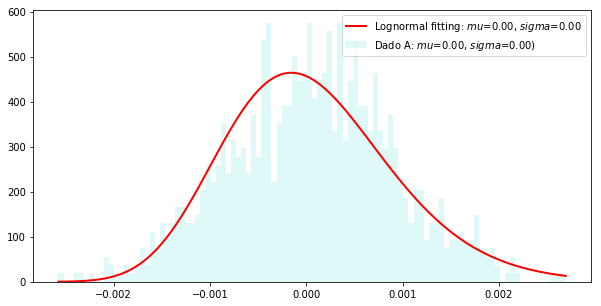

In [26]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.002573   max:  0.002692 
median:  6.65e-05 
mean:  5.816406e-05 
estimated sd:  0.0008541091 
estimated skewness:  -0.005145306 
estimated kurtosis:  2.895282 



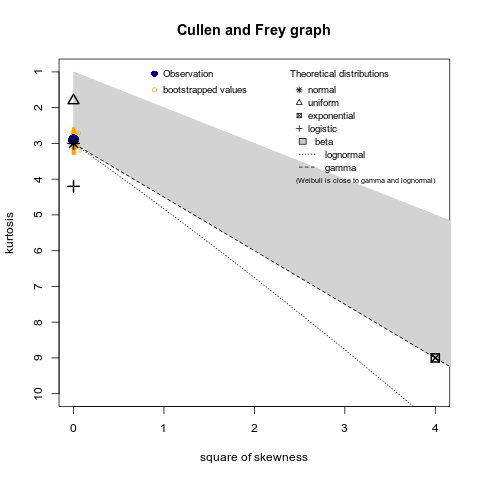

In [27]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (4.3843818669130332, 4.3877587909422644, -0.002673, 0.0054650000000000002)
        Fitado			 Original
mean :  5.844809656276864e-05 	 5.81640625e-05
var  :  7.640654596490277e-07 	 7.28789928162e-07
skew :  0.00044685700073701423 	 -0.005137765424454573
kurt :  -0.5096776319526652 	 -0.11006101397202306


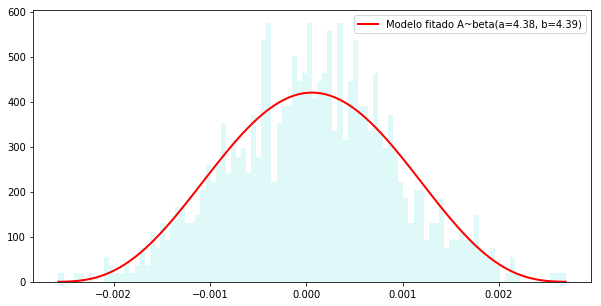

In [28]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

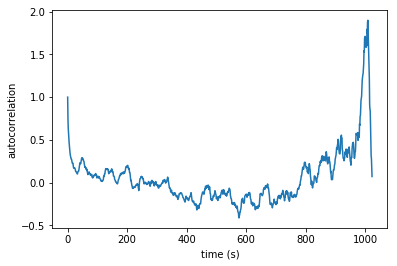

In [29]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [ 0.000383  0.000463  0.000772  0.001346  0.001949  0.002692  0.002
  0.001873  0.002616  0.001794]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


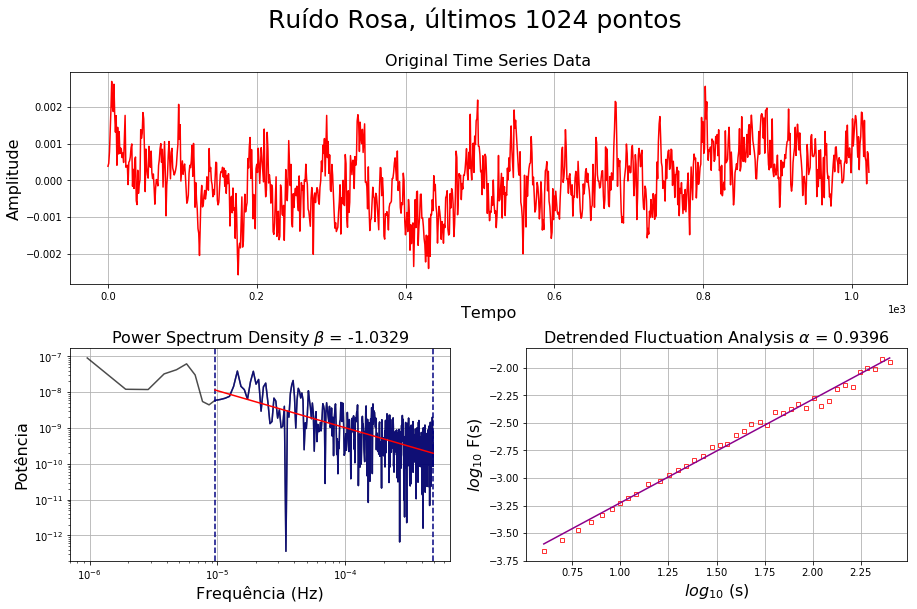

In [30]:
aux.plot_psd_dfa(A, 'Ruído Rosa, últimos 1024 pontos')